In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import exp, expm1, log
from numpy import amin,amax,zeros,ceil

In [2]:
Data = pd.read_excel('S&P500.xlsx', usecols="F,G")

In [3]:
#x == pd.read_excel('S&P500.xlsx', usecols="F")
#y == pd.read_excel('S&P500.xlsx', usecols="G")
#print(x)
#print(y)
x=np.array(Data['Price'])
y=np.array(Data['Volume'])
print(x)
print(y)

[ 987.47998  1002.630005 1005.650024 ... 3020.969971 3013.179932
 2980.379883]
[5139070000 5603440000 5713700000 ... 3203710000 3634330000 4623430000]


C:\Users\Spock\Anaconda3\Anaconda33\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


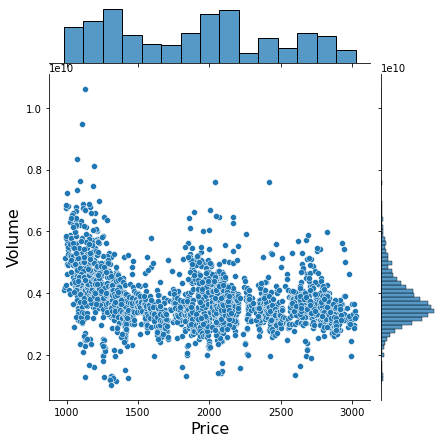

In [4]:
h=sns.jointplot(x,y)

# JointGrid has a convenience function
h.set_axis_labels('Price', 'Volume', fontsize=16)


C:\Users\Spock\Anaconda3\Anaconda33\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

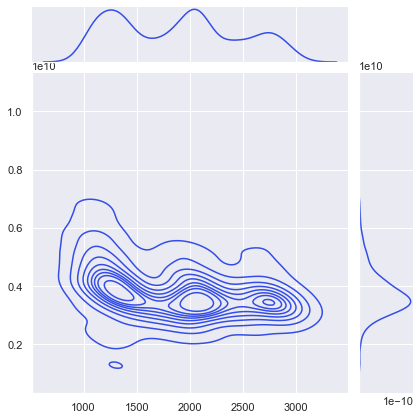

In [5]:
sns.set()
sns.jointplot(x,y, kind='kde',color=[.2,.3,.9])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

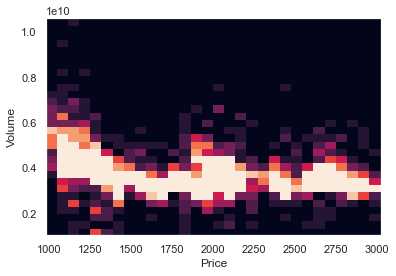

In [6]:
plt.hist2d(x,y,30,vmax=10)
plt.xlabel('Price')
plt.ylabel('Volume')
plt.show

In [7]:
price_markets=pd.read_excel('S&P500.xlsx', usecols="F")
volume_markets=pd.read_excel('S&P500.xlsx', usecols="G")

In [8]:
def price_return(price_markets):
    ret=[]
    for i in range(1,len(price_markets)):
        ret.append(log(price_markets.iloc[i])-log(price_markets.iloc[i-1]))
    return ret

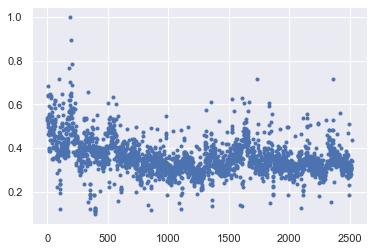

In [9]:
r=price_return(price_markets)

vol_ret=[]
maxx = np.max(volume_markets["Volume"].values)

for i in range(1,len(volume_markets.values)):
    vol_ret.append(volume_markets["Volume"].values[i]/maxx)
    
plt.plot(vol_ret,'.')

In [10]:
 def joint_pdf(data1,data2,delta_x,delta_y):
        dlim_data1 = int(min(data1)/delta_x) * delta_x
        dlim_data2 = int(min(data2)/delta_y) * delta_y
        ulim_data1 = int(max(data1)/delta_x) * delta_x
        ulim_data2 = int(max(data2)/delta_y) * delta_y
        x_values = np.zeros(int(((ulim_data1 - dlim_data1) / delta_x) + 1))
        y_values = np.zeros(int(((ulim_data2 - dlim_data2) / delta_y) + 1))
        pdf = np.zeros((int(((ulim_data1 - dlim_data1) / delta_x) + 1),\
        int(((ulim_data2 - dlim_data2) / delta_y) + 1)))
        for i in range(0,len(x_values)):
            x_values[i] = dlim_data1 + (i * delta_x)
        for i in range(0,len(y_values)):
            y_values[i] = dlim_data2 + (i * delta_y)

        for i in range(min(len(data1),len(data2))):
            block_one = int((data1[i]-dlim_data1)/delta_x)
            block_two = int((data2[i]-dlim_data2)/delta_y)
            pdf[block_one][block_two]+=1
        # self.pdf/=(len(self.pdf)**2 * self.delta_x)
        # self.pdf/=(sum(self.pdf) * self.delta_x)
        # pdf/=sum(pdf)
        # self.pdf/=(len(self.data1)*len(self.data2))
        return {'pdf':pdf,'x_values':x_values,'y_values':y_values,'dlim':dlim_data1}

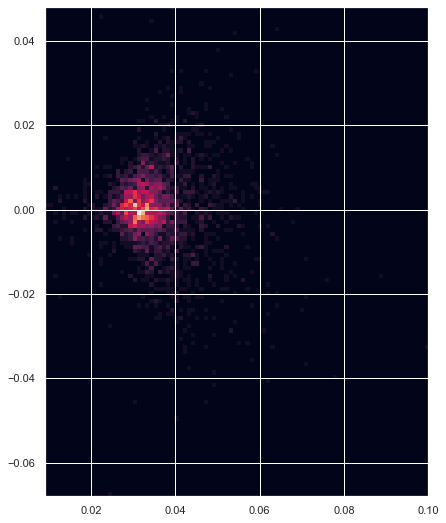

In [21]:
fig = plt.figure(figsize=(16,9))
joint_funct = joint_pdf(r,vol_ret,0.001,0.01)
snpv_pdf = joint_funct['pdf']
x = joint_funct['x_values']
y = joint_funct['y_values']
plt.imshow(snpv_pdf, extent=[min(y)/10,max(y)/10,min(x),max(x)], origin='lower')
# plt.xlabel('volume',size=20)
# plt.ylabel('PDF',size=20)
# plt.show()

In [12]:
def quantum_potential(pdf,betta):
        sec_xdev = np.zeros(pdf.shape)
        for i in range(2,pdf.shape[0]-2):
            for j in range(pdf.shape[1]):
                sec_xdev[i][j] = (-pdf[i+2][j]+8*pdf[i+1][j]\
                -8*pdf[i-1][j]+pdf[i-2][j])/(12*1)

        sec_ydev = np.zeros(pdf.shape)
        for i in range(pdf.shape[0]):
            for j in range(2,pdf.shape[1]-2):
                sec_ydev[i][j] = (-pdf[i][j+2]+8*pdf[i][j+1]\
                -8*pdf[i][j-1]+pdf[i][j-2])/(12*1)

        Q_x = np.array(sec_xdev)/np.array(pdf)
        Q_y = np.array(sec_ydev)/np.array(pdf)
        Q_tot = Q_x + betta*Q_y

        return {'Q_x':Q_x , 'Q_y':Q_y , 'Q_tot':Q_tot}

<ipython-input-12-bfd418b50af2>:14: RuntimeWarning: divide by zero encountered in true_divide
  Q_x = np.array(sec_xdev)/np.array(pdf)
<ipython-input-12-bfd418b50af2>:14: RuntimeWarning: invalid value encountered in true_divide
  Q_x = np.array(sec_xdev)/np.array(pdf)
<ipython-input-12-bfd418b50af2>:15: RuntimeWarning: divide by zero encountered in true_divide
  Q_y = np.array(sec_ydev)/np.array(pdf)
<ipython-input-12-bfd418b50af2>:15: RuntimeWarning: invalid value encountered in true_divide
  Q_y = np.array(sec_ydev)/np.array(pdf)
<ipython-input-12-bfd418b50af2>:16: RuntimeWarning: invalid value encountered in add
  Q_tot = Q_x + betta*Q_y


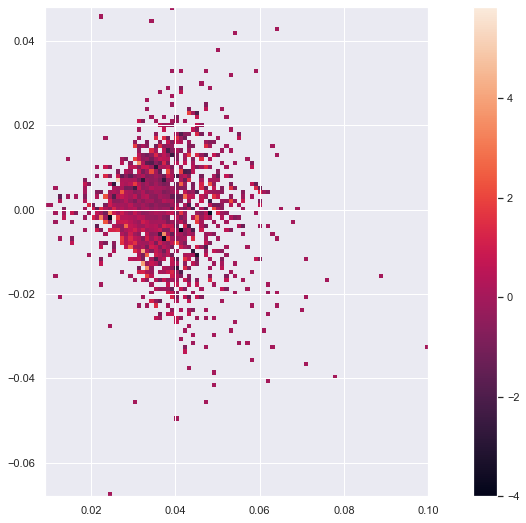

In [13]:
plt.figure(figsize=(16,9))
q = quantum_potential(snpv_pdf,1)['Q_tot']
plt.imshow(q, extent=[min(y)/10,max(y)/10,min(x),max(x)], origin='lower')
plt.colorbar()

In [14]:
def kernel_2d(grid,sigma1,sigma2):
        data_kernel=np.zeros(grid.shape)
        for i in range(sigma1,grid.shape[0]-sigma1):
            for k in range(sigma2,grid.shape[1]-sigma2):
                for j in range(-sigma1,sigma1):
                    for l in range(-sigma2,sigma2):
                        data_kernel[i,k]+=grid[i+j][k+l]*np.exp(-0.5*((j/sigma1)**2+(l/sigma2)**2))

        data_kernel/=np.sum(data_kernel)
        return data_kernel


In [15]:
kern = kernel_2d(joint_funct['pdf'],5,5)

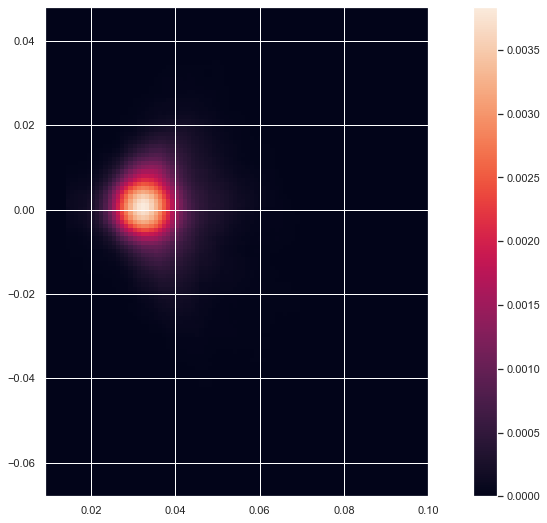

In [16]:
plt.figure(figsize=(16,9))

plt.imshow(kern, extent=[min(y)/10,max(y)/10,min(x),max(x)], origin='lower')
plt.colorbar()

Here again we calculate the quantum potential, but this time we use the matrix that has been produced by kernel:

<ipython-input-12-bfd418b50af2>:14: RuntimeWarning: divide by zero encountered in true_divide
  Q_x = np.array(sec_xdev)/np.array(pdf)
<ipython-input-12-bfd418b50af2>:14: RuntimeWarning: invalid value encountered in true_divide
  Q_x = np.array(sec_xdev)/np.array(pdf)
<ipython-input-12-bfd418b50af2>:15: RuntimeWarning: divide by zero encountered in true_divide
  Q_y = np.array(sec_ydev)/np.array(pdf)
<ipython-input-12-bfd418b50af2>:15: RuntimeWarning: invalid value encountered in true_divide
  Q_y = np.array(sec_ydev)/np.array(pdf)
<ipython-input-12-bfd418b50af2>:16: RuntimeWarning: invalid value encountered in add
  Q_tot = Q_x + betta*Q_y


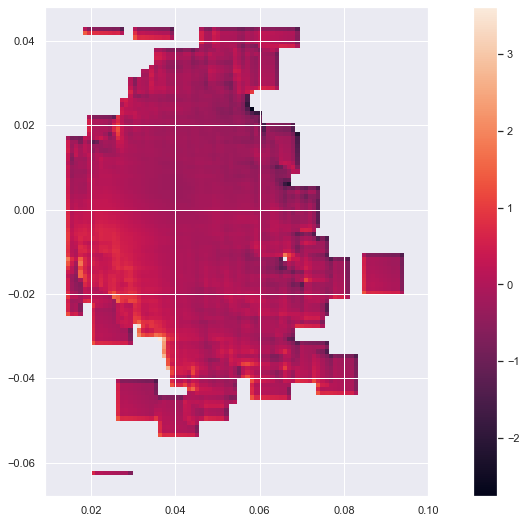

In [17]:
plt.figure(figsize=(16,9))
q_kern = quantum_potential(kern,1)['Q_tot']
plt.imshow(q_kern, extent=[min(y)/10,max(y)/10,min(x),max(x)], origin='lower')
plt.colorbar()